In [27]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets, preprocessing, model_selection
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [19]:
gcd_data = pd.read_csv('./german_credit.csv')

In [20]:
gcd_data.head(10)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


In [21]:
gcd_data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [24]:
# Vì mong muốn dự báo KH xấu, chuyển các KH tốt về Credibility=0, và KH xấu về Credibility=1
gcd_data.loc[:,'Creditability'] = 1 - gcd_data.loc[:,'Creditability']
gcd_data.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [25]:
#choose Features - chọn biến
features = gcd_data.columns[1:]
#get data
X = gcd_data.loc[:,features].values
y = gcd_data.loc[:,'Creditability'].values

#train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.3)

In [26]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)
print('Coeficient',logit.coef_)
y_pred = logit.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-5.84295573e-01  1.52215585e-02 -3.92038449e-01 -9.90402755e-03
   1.54300907e-04 -2.29687564e-01 -2.08685755e-01  3.39566515e-01
  -2.93448372e-01 -3.62626394e-01  8.01131208e-02  1.62679689e-01
  -1.36962240e-02 -7.72022162e-02 -1.84997324e-01  2.68914884e-01
   8.89286323e-02  3.85389619e-01 -3.55654939e-01  3.37257185e-01]]
Confusion Matrix:
 [[166  17]
 [ 80  37]]


(AUC = 0.76)
(GINI = 0.52)


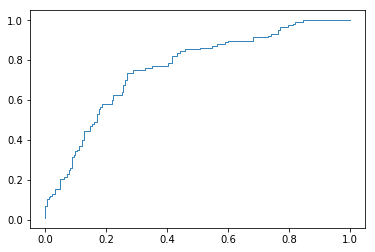

In [33]:
y_prob = logit.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))

In [35]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logit.fit(X_train_scaled, y_train)

print('Coeficient',logit.coef_)
y_pred = logit.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-0.74873701  0.16197038 -0.42051851 -0.04753078  0.46544695 -0.38173878
  -0.2592313   0.365458   -0.25636536 -0.22180972  0.06023882  0.15436921
  -0.16059668 -0.12912536 -0.14983515  0.13725877  0.01675505  0.14385724
  -0.19690787 -0.04007932]]
Confusion Matrix:
 [[165  18]
 [ 78  39]]
Precision:  0.9016393442622951
Recall:  0.6790123456790124


D:\Program\Anacondax64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(AUC = 0.77)
(GINI = 0.53)


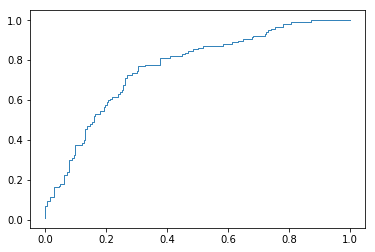

In [37]:
y_prob = logit.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))

In [40]:
logit1 = linear_model.LogisticRegression(C=0.05)
logit1.fit(X_train_scaled, y_train)

print('Coeficient',logit1.coef_)
y_pred = logit1.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-0.58079686  0.17000713 -0.32390959 -0.02124297  0.31584415 -0.2866842
  -0.20213807  0.23535208 -0.19263984 -0.15356613  0.043916    0.13835253
  -0.12317314 -0.09757463 -0.11078816  0.07646884  0.01388063  0.1005815
  -0.13678042 -0.03069718]]
Confusion Matrix:
 [[165  18]
 [ 74  43]]
Precision:  0.9016393442622951
Recall:  0.6903765690376569


(AUC = 0.77)
(GINI = 0.54)


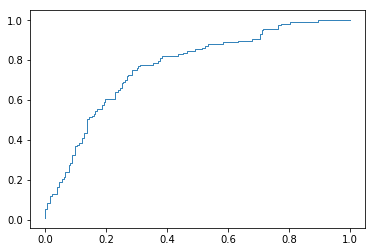

In [41]:
y_prob = logit1.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))

In [43]:
from sklearn.model_selection import GridSearchCV
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ('Training set error', (gs.cv_results_['mean_train_score']*100).round(2))
    print ('Validation set error', (gs.cv_results_['mean_test_score']*100).round(2))
    best = gs.best_estimator_
    return best
print([(e+1)/10 for e in range(11)])
best_logit = cv_optimize(logit1, {'C':[(e+1)/10 for e in range(11)]}, X_train_scaled, y_train, score_func = 'f1')
print(best_logit)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
Training set error [56.1  55.79 56.   55.93 55.93 55.93 55.82 55.78 55.78 55.78 55.78]
Validation set error [50.94 51.46 51.17 50.84 50.84 50.38 50.38 50.38 50.38 50.38 50.38]
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


D:\Program\Anacondax64\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [44]:
print('Coeficient',best_logit.coef_)
y_pred = best_logit.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
print('Precision: ', cm[0,0]/sum(cm[0,:]))
print('Recall: ', cm[0,0]/sum(cm[:,0]))

Coeficient [[-0.69903317  0.1673819  -0.39165788 -0.03923876  0.41662436 -0.35294501
  -0.24215168  0.32401848 -0.23687139 -0.20106557  0.05534846  0.15053915
  -0.14893371 -0.11922189 -0.13821761  0.11831043  0.01576475  0.13041318
  -0.17777956 -0.03637744]]
Confusion Matrix:
 [[165  18]
 [ 77  40]]
Precision:  0.9016393442622951
Recall:  0.6818181818181818


(AUC = 0.77)
(GINI = 0.53)


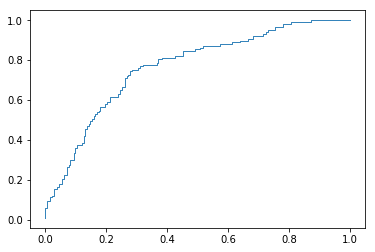

In [45]:
y_prob = best_logit.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.9,
        label='(AUC = %0.2f)' % (roc_auc))
print('(AUC = %0.2f)' % (roc_auc))
print('(GINI = %0.2f)' % (roc_auc*2-1))